# <b><span style='color:#F1A424'>AutoML - Binary Classification </span> </b>

## <b> Problem overview:</b>
    

**Dataset used - Breast Cancer Dataset**

**Features**:

- `ID number`
-  `Diagnosis` : (M = malignant, B = benign)

- Ten real-valued features are computed for each cell nucleus:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

- The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

- All feature values are recoded with four significant digits.

- Missing attribute values: none


**Target Variable**:

- `diagnosis`: 357 benign, 212 malignant

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the type of cancer i.e., benign and malignant.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.



In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','breast_cancer')

In [5]:
# Fetching in teradata dataframe
cancer_df = DataFrame("breast_cancer")

In [6]:
# first 5 rows
cancer_df.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [7]:
# cancer_df dataset
cancer_df.shape

(569, 32)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
cancer_df_sample = cancer_df.sample(frac = [0.8, 0.2])

In [9]:
cancer_df_sample.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,sampleid
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472,1
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179,1
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368,1
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376,1
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486,1
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082,1
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789,1
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834,1
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,1
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019,1


In [10]:
# Fetching train and test data
cancer_df_train= cancer_df_sample[cancer_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
cancer_df_test = cancer_df_sample[cancer_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
cancer_df_train.shape

(455, 32)

In [12]:
# test data shape
cancer_df_test.shape

(114, 32)

In [13]:
#train dataset
cancer_df_train.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
8915,B,14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472
85715,M,13.17,18.66,85.98,534.6,0.1158,0.1231,0.1226,0.0734,0.2128,0.06777,0.2871,0.8937,1.897,24.25,0.006532,0.02336,0.02905,0.01215,0.01743,0.003643,15.67,27.95,102.8,759.4,0.1786,0.4166,0.5006,0.2088,0.39,0.1179
86208,M,20.26,23.03,132.4,1264.0,0.09078,0.1313,0.1465,0.08683,0.2095,0.05649,0.7576,1.509,4.554,87.87,0.006016,0.03482,0.04232,0.01269,0.02657,0.004411,24.22,31.59,156.1,1750.0,0.119,0.3539,0.4098,0.1573,0.3689,0.08368
86211,B,12.18,17.84,77.79,451.1,0.1045,0.07057,0.0249,0.02941,0.19,0.06635,0.3661,1.511,2.41,24.44,0.005433,0.01179,0.01131,0.01519,0.0222,0.003408,12.83,20.92,82.14,495.2,0.114,0.09358,0.0498,0.05882,0.2227,0.07376
86408,B,12.63,20.76,82.15,480.4,0.09933,0.1209,0.1065,0.06021,0.1735,0.0707,0.3424,1.803,2.711,20.48,0.01291,0.04042,0.05101,0.02295,0.02144,0.005891,13.33,25.47,89.0,527.4,0.1287,0.225,0.2216,0.1105,0.2226,0.08486
86409,B,14.26,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.49,3.399,29.25,0.005298,0.07446,0.1435,0.02292,0.02566,0.01298,15.3,23.73,107.0,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.1082
86355,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,0.07039,1.215,1.545,10.05,170.0,0.006515,0.08668,0.104,0.0248,0.03112,0.005037,28.4,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.291,0.4055,0.09789
9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.0239,0.1735,0.062,0.1458,0.905,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.0187,0.001972,13.86,23.02,89.69,580.9,0.1172,0.1958,0.181,0.08388,0.3297,0.07834
8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
8670,M,15.46,19.48,101.7,748.9,0.1092,0.1223,0.1466,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.00624,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.0,124.9,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [14]:
# test dataset
cancer_df_test.head()

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
89296,B,11.46,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.01502,0.1411,0.06243,0.3278,1.059,2.475,22.93,0.006652,0.02652,0.02221,0.007807,0.01894,0.003411,12.68,21.61,82.69,489.8,0.1144,0.1789,0.1226,0.05509,0.2208,0.07638
852552,M,16.65,21.38,110.0,904.6,0.1121,0.1457,0.1525,0.0917,0.1995,0.0633,0.8068,0.9017,5.455,102.6,0.006048,0.01882,0.02741,0.0113,0.01468,0.002801,26.46,31.56,177.0,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564
852763,M,14.58,21.53,97.41,644.8,0.1054,0.1868,0.1425,0.08783,0.2252,0.06924,0.2545,0.9832,2.11,21.05,0.004452,0.03055,0.02681,0.01352,0.01454,0.003711,17.62,33.21,122.4,896.9,0.1525,0.6643,0.5539,0.2701,0.4264,0.1275
852781,M,18.61,20.25,122.1,1094.0,0.0944,0.1066,0.149,0.07731,0.1697,0.05699,0.8529,1.849,5.632,93.54,0.01075,0.02722,0.05081,0.01911,0.02293,0.004217,21.31,27.26,139.9,1403.0,0.1338,0.2117,0.3446,0.149,0.2341,0.07421
854941,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.342,1.17,14.16,0.004352,0.004899,0.01343,0.01164,0.02671,0.001777,13.3,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
855133,M,14.99,25.2,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.214,2.188,8.077,106.0,0.006883,0.01094,0.01818,0.01917,0.007882,0.001754,14.99,25.2,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
854268,M,14.25,21.72,93.63,633.0,0.09823,0.1098,0.1319,0.05598,0.1885,0.06125,0.286,1.019,2.657,24.91,0.005878,0.02995,0.04815,0.01161,0.02028,0.004022,15.89,30.36,116.2,799.6,0.1446,0.4238,0.5186,0.1447,0.3591,0.1014
91504,M,13.82,24.49,92.33,595.9,0.1162,0.1681,0.1357,0.06759,0.2275,0.07237,0.4751,1.528,2.974,39.05,0.00968,0.03856,0.03476,0.01616,0.02434,0.006995,16.01,32.94,106.0,788.0,0.1794,0.3966,0.3381,0.1521,0.3651,0.1183
87127,B,10.8,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.064,0.1728,0.4064,1.126,11.48,0.007809,0.009816,0.01099,0.005344,0.01254,0.00212,11.6,12.02,73.66,414.0,0.1436,0.1257,0.1047,0.04603,0.209,0.07699
86561,B,13.85,17.21,88.44,588.7,0.08785,0.06136,0.0142,0.01141,0.1614,0.0589,0.2185,0.8561,1.495,17.91,0.004599,0.009169,0.009127,0.004814,0.01247,0.001708,15.49,23.58,100.3,725.9,0.1157,0.135,0.08115,0.05104,0.2364,0.07182


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Using all models from model training.
# Keeping early stopping timer threshold to 400 sec
# and verbose level 2 for detailed loggging

aml = AutoClassifier(max_runtime_secs=400, 
                     verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 455
Total Columns in the data: 32

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
concave_points_se,FLOAT,455,0,None,11,444,0,0.0,100.0
radius_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
concavity_worst,FLOAT,455,0,None,11,444,0,0.0,100.0
area_se,FLOAT,455,0,None,0,455,0,0.0,100.0
smoothness_se,FLOAT,455,0,None,0,455,0,0.0,100.0
fractal_dimension_worst,FLOAT,455,0,None,0,455,0,0.0,100.0
compactness_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
perimeter_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
symmetry_mean,FLOAT,455,0,None,0,455,0,0.0,100.0
fractal_dimension_mean,FLOAT,455,0,None,0,455,0,0.0,100.0



Statistics of Data:


func,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
50%,905557,13.37,18.9,86.34,551.1,0.096,0.094,0.062,0.035,0.179,0.062,0.327,1.111,2.281,24.53,0.006,0.021,0.026,0.011,0.019,0.003,14.92,25.5,97.96,680.6,0.132,0.216,0.239,0.101,0.283,0.08
count,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455
mean,25301972.705,14.134,19.359,92.024,655.199,0.096,0.105,0.09,0.049,0.181,0.063,0.403,1.217,2.852,40.392,0.007,0.026,0.032,0.012,0.02,0.004,16.29,25.765,107.378,882.385,0.133,0.255,0.274,0.115,0.291,0.084
min,8670,6.981,10.38,43.79,143.5,0.053,0.019,0,0,0.106,0.05,0.112,0.36,0.757,6.802,0.002,0.002,0,0,0.01,0.001,7.93,12.49,50.41,185.2,0.071,0.027,0,0,0.157,0.055
max,911320501,28.11,39.28,188.5,2501,0.163,0.345,0.427,0.201,0.304,0.097,2.873,4.885,21.98,542.2,0.031,0.135,0.396,0.053,0.079,0.03,36.04,49.54,251.2,4254,0.223,0.938,1.252,0.291,0.664,0.173
75%,8812329,15.815,21.875,104.4,790.25,0.105,0.13,0.13,0.074,0.195,0.066,0.48,1.456,3.377,45.41,0.008,0.032,0.042,0.015,0.023,0.005,19.125,30.08,126.8,1122.5,0.146,0.341,0.385,0.166,0.318,0.093
25%,867970.5,11.705,16.17,75.1,420.3,0.085,0.065,0.03,0.02,0.162,0.058,0.231,0.852,1.597,17.67,0.005,0.013,0.015,0.008,0.015,0.002,13.04,21.045,84.075,516.15,0.116,0.148,0.114,0.065,0.25,0.072
std,105781658.394,3.504,4.391,24.193,349.626,0.015,0.054,0.082,0.039,0.028,0.007,0.281,0.562,2.054,47.143,0.003,0.018,0.032,0.006,0.008,0.003,4.799,6.179,33.264,563.81,0.023,0.155,0.207,0.065,0.063,0.017



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
diagnosis                 2         

No Futile columns found.

Target Column Distribution:


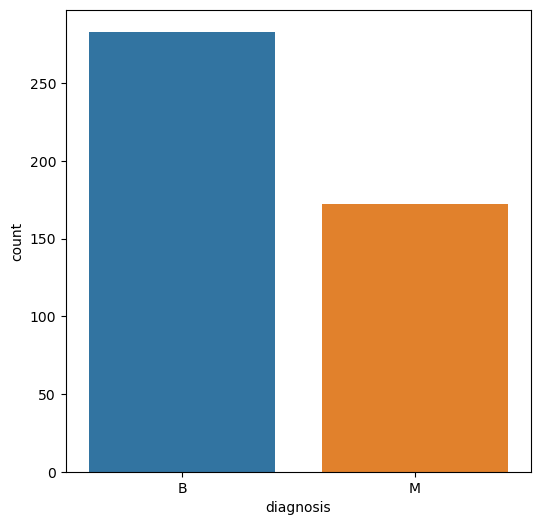

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
               ColumnName  OutlierPercentage
0                 area_se          10.549451
1           symmetry_mean           3.296703
2               radius_se           5.714286
3              texture_se           4.175824
4        compactness_mean           3.076923
5                      id          14.065934
6  fractal_dimension_mean           2.637363
7          perimeter_mean           2.197802
8               area_mean           3.516484
9          concavity_mean           3.516484


Analysis complete. No action taken.                                                     


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171227110907567"'9


Dataset does not contain any feature related to dates.                                   


No Missing Values Detected.                                                              


No imputation is Required.                                                               


Encoding not required.                                                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


area_worst,symmetry_mean,symmetry_worst,concave_points_se,compactness_worst,smoothness_se,concavity_se,symmetry_se,area_se,area_mean,perimeter_mean,perimeter_se,fractal_dimension_se,fractal_dimension_worst,radius_se,concavity_mean,compactness_mean,concave_points_worst,texture_mean,concave_points_mean,smoothness_worst,radius_worst,fractal_dimension_mean,radius_mean,texture_worst,smoothness_mean,texture_se,perimeter_worst,compactness_se,id,concavity_worst,diagnosis
1436.0,0.1867,0.3216,0.009875,0.2567,0.004493,0.02048,0.01144,45.42,928.3,111.6,2.819,0.001575,0.0757,0.4203,0.09061,0.08995,0.1984,22.07,0.06527,0.1558,21.58,0.0558,17.19,29.33,0.09726,0.7383,140.5,0.01206,10,0.3889,1
809.7,0.1744,0.2852,0.01527,0.2521,0.00579,0.05303,0.03356,39.43,689.5,97.84,3.271,0.009368,0.09218,0.422,0.0905,0.1167,0.08405,18.77,0.03562,0.0997,16.25,0.06493,14.95,25.47,0.08138,1.909,107.1,0.04877,8,0.25,0
522.9,0.2019,0.3075,0.009276,0.2187,0.009895,0.0163,0.02258,19.53,433.8,76.39,1.93,0.002272,0.07351,0.2747,0.02555,0.0812,0.08263,21.17,0.02179,0.1426,13.05,0.0629,11.89,27.21,0.09773,1.203,85.09,0.03053,19,0.1164,0
300.2,0.2378,0.3038,0.02188,0.3441,0.009783,0.03483,0.02542,20.04,248.7,61.49,3.014,0.01045,0.1252,0.4076,0.0973,0.2239,0.1025,12.87,0.05252,0.1902,10.28,0.09502,9.268,16.38,0.1634,1.093,69.05,0.04542,25,0.2099,0
1222.0,0.1813,0.3138,0.01262,0.2405,0.004757,0.02332,0.01394,33.63,928.2,113.0,2.193,0.002362,0.08113,0.3093,0.1266,0.1041,0.1857,17.08,0.08353,0.1416,19.85,0.05613,17.3,25.09,0.1008,0.8568,130.9,0.01503,23,0.3378,1
643.8,0.1778,0.3549,0.007584,0.2548,0.005324,0.0151,0.02104,16.64,512.2,83.74,1.689,0.001887,0.08118,0.2143,0.04894,0.09509,0.1012,15.92,0.03088,0.1312,14.48,0.06235,12.9,21.82,0.08677,0.7712,97.17,0.01563,30,0.209,0
1233.0,0.1861,0.2792,0.01167,0.2236,0.00677,0.03067,0.01875,74.08,813.0,105.1,4.533,0.003434,0.08158,0.7049,0.09447,0.1137,0.1216,18.05,0.05943,0.1314,19.92,0.06248,16.11,25.27,0.09721,1.332,129.0,0.01938,9,0.2802,1
680.6,0.1421,0.2694,0.005179,0.1457,0.004942,0.007508,0.01442,14.91,562.1,85.89,1.4,0.001684,0.07061,0.1689,0.01271,0.04726,0.05781,28.21,0.01117,0.1108,14.69,0.05763,13.46,35.63,0.07517,1.15,97.11,0.01203,28,0.07934,0
1748.0,0.2085,0.3003,0.02139,0.4002,0.008198,0.04493,0.02018,176.5,803.1,102.9,9.424,0.005815,0.1048,1.37,0.1522,0.1571,0.2134,21.08,0.08481,0.1517,23.17,0.06864,15.5,27.65,0.112,1.213,157.1,0.03889,15,0.4211,1
1228.0,0.177,0.2369,0.01444,0.1963,0.00553,0.0611,0.0214,76.36,1024.0,117.4,4.312,0.005036,0.06558,0.6362,0.1103,0.08642,0.09181,21.84,0.05778,0.08822,19.76,0.0534,18.08,24.7,0.07371,1.305,129.1,0.05296,16,0.2535,1


area_worst,symmetry_mean,symmetry_worst,concave_points_se,compactness_worst,smoothness_se,concavity_se,symmetry_se,area_se,area_mean,perimeter_mean,perimeter_se,fractal_dimension_se,fractal_dimension_worst,radius_se,concavity_mean,compactness_mean,concave_points_worst,texture_mean,concave_points_mean,smoothness_worst,radius_worst,fractal_dimension_mean,radius_mean,texture_worst,smoothness_mean,texture_se,perimeter_worst,compactness_se,id,concavity_worst,diagnosis
610.2,0.1966,0.3455,0.01075,0.1795,0.005888,0.02059,0.02578,25.79,466.1,78.41,2.079,0.002267,0.06896,0.3342,0.03211,0.06526,0.09532,17.92,0.02653,0.124,14.1,0.05597,12.27,28.88,0.08685,1.781,89.0,0.0231,27,0.1377,0
2384.0,0.1721,0.2833,0.01561,0.4725,0.005687,0.06329,0.01924,156.8,1491.0,147.3,8.867,0.004614,0.08858,1.167,0.2195,0.1961,0.1841,20.99,0.1088,0.1272,28.19,0.06194,21.75,28.18,0.09401,1.352,195.9,0.0496,18,0.5807,1
576.0,0.1652,0.2432,0.007315,0.1975,0.005231,0.03113,0.01639,14.41,514.3,84.08,0.9219,0.005701,0.1009,0.1814,0.03738,0.09965,0.0585,14.23,0.02098,0.1142,13.72,0.07238,12.99,16.91,0.09462,0.6412,87.38,0.02305,113,0.145,0
1165.0,0.2175,0.4824,0.01656,0.4665,0.005635,0.06072,0.03197,45.5,840.4,109.0,2.972,0.004085,0.09614,0.4312,0.1811,0.1497,0.2248,23.29,0.08773,0.1415,19.38,0.06218,16.35,31.03,0.09742,1.022,129.3,0.03917,31,0.7087,1
544.1,0.1602,0.2983,0.005558,0.1963,0.003457,0.01167,0.01251,9.227,466.7,79.01,0.8484,0.001356,0.07185,0.1199,0.02643,0.06815,0.08442,18.54,0.01921,0.1184,13.29,0.06066,12.36,27.49,0.08477,0.8944,85.56,0.01047,22,0.1937,0
2081.0,0.2162,0.3828,0.01288,0.5717,0.005215,0.04718,0.02045,80.99,1407.0,144.4,4.158,0.004028,0.1007,0.6242,0.281,0.2087,0.2422,22.28,0.1562,0.1502,26.23,0.06606,21.61,28.74,0.1167,0.9209,172.0,0.03726,159,0.7053,1
1030.0,0.1616,0.2675,0.009222,0.2057,0.004675,0.01603,0.01095,29.91,712.8,97.26,2.097,0.001629,0.07873,0.3105,0.05253,0.07081,0.153,22.02,0.03334,0.1389,18.1,0.05684,15.1,31.69,0.09056,0.8339,117.7,0.0103,26,0.2712,1
533.7,0.2101,0.3101,0.01846,0.085,0.008034,0.01514,0.02921,37.83,427.3,74.24,3.717,0.002005,0.06688,0.5619,0.02245,0.0434,0.0829,14.02,0.02763,0.1036,13.31,0.06113,11.74,18.26,0.07813,1.268,84.7,0.01442,174,0.06735,0
959.5,0.1949,0.2844,0.01848,0.6247,0.009407,0.06899,0.017,60.78,645.7,96.42,5.373,0.006113,0.1132,0.7036,0.2135,0.2008,0.1785,22.15,0.08653,0.164,17.67,0.07292,14.25,29.51,0.1049,1.268,119.1,0.07056,46,0.6922,1
777.5,0.1573,0.2525,0.008281,0.155,0.005756,0.01461,0.01551,23.92,673.7,94.89,1.612,0.002168,0.06827,0.3028,0.03346,0.07074,0.07971,16.94,0.02877,0.1218,16.31,0.05703,14.86,20.54,0.08924,0.6683,102.3,0.01665,112,0.122,0


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0  fractal_dimension_se           5.714286
1             area_mean           3.516484
2          perimeter_se           5.494505
3     compactness_worst           2.417582
4            area_worst           3.736264
5        perimeter_mean           2.197802
6     concave_points_se           3.296703
7        compactness_se           5.494505
8             radius_se           5.714286
9   concave_points_mean           1.758242


['symmetry_mean', 'area_mean', 'compactness_worst', 'radius_se', 'fractal_dimension_se', 'concavity_se', 'concave_points_se', 'area_worst', 'symmetry_worst', 'perimeter_se', 'symmetry_se', 'concave_points_mean', 'compactness_se', 'perimeter_mean', 'smoothness_se', 'fractal_dimension_worst', 'fractal_dimension_mean', 'radius_worst', 'concavity_mean', 'perimeter_worst', 'concavity_worst', 'compactness_mean', 'texture_mean', 'radius_mean', 'smoothness_worst', 'texture_worst', 'smoothness_mean', 'texture_se']
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171226961219255"'19


['area_se']
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171226648163016"'19


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171234816825271"'19
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171228244632892"'


['area_worst', 'symmetry_mean', 'symmetry_worst', 'compactness_worst', 'concavity_se', 'area_se', 'area_mean', 'perimeter_mean', 'perimeter_se', 'fractal_dimension_worst', 'radius_se', 'concavity_mean', 'concave_points_worst', 'texture_mean', 'concave_points_mean', 'smoothness_worst', 'radius_worst', 'radius_mean', 'texture_worst', 'smoothness_mean', 'texture_se', 'perimeter_worst', 'compactness_se', 'concavity_worst']


['area_worst', 'symmetry_mean', 'symmetry_worst', 'compactness_worst', 'concavity_se', 'area_se', 'area_mean', 'perimeter_mean', 'perimeter_se', 'fractal_dimension_worst', 'radius_se', 'concavity_mean', 'concave_points_worst', 'texture_mean', 'concave_points_mean', 'smoothness_worst', 'radius_worst', 'radius_mean', 'texture_worst', 'smoothness_mean', 'texture_se', 'perimeter_worst', 'compactness_se', 'concavity_worst']


id,diagnosis,area_worst,symmetry_mean,symmetry_worst,compactness_worst,concavity_se,area_se,area_mean,perimeter_mean,perimeter_se,fractal_dimension_worst,radius_se,concavity_mean,concave_points_worst,texture_mean,concave_points_mean,smoothness_worst,radius_worst,radius_mean,texture_worst,smoothness_mean,texture_se,perimeter_worst,compactness_se,concavity_worst
2,1,0.5166155419222904,0.4024276377217554,0.4695095948827292,0.22844663881503988,0.32674772036474165,0.7727944592254741,0.36512332323669405,0.46051911072171725,0.49512144488270704,0.2694214876033058,0.493952453774503,0.23025540275049114,0.47736625514403297,0.4667365112624411,0.2689601250977326,0.5364963503649636,0.6043295249549009,0.4780932611757729,0.6143838091796169,0.4430379746835442,0.4006517975353906,0.6012353528930874,0.1637080867850099,0.35997277059223964
4,0,0.34164110429447847,0.5191409897292251,0.7398720682302772,0.5281048233953666,0.22948328267477205,0.19570083196080917,0.3527477282561662,0.47804183550542106,0.1424122898069338,0.484297520661157,0.11872653969136661,0.1650294695481336,0.5872427983539095,0.4206390780513358,0.2462861610633307,0.739963503649635,0.4461815995189417,0.48031729557417163,0.44416335381279365,0.7120253164556961,0.12557286892758937,0.4677082387137797,0.2386587771203156,0.3613342409802587
5,0,0.3332055214723927,0.22222222222222238,0.03240938166311311,0.13824534751234335,0.11702127659574468,0.47590692174500615,0.38286456079619213,0.488226919285949,0.30682997716421,0.17685950413223128,0.33629917975809814,0.04165029469548134,0.13621399176954732,0.2655840754321634,0.07740422204847537,0.23631386861313877,0.4413710162357186,0.504040329157091,0.16732923744127215,0.4066455696202531,0.06268459109888991,0.4313743300935599,0.1834319526627219,0.047923757658270935
6,0,0.3981339468302659,0.6666666666666666,0.49936034115138594,0.6236232434485379,0.5531914893617021,0.2761518645213058,0.4681955863262657,0.5876683824334684,0.31534149885821045,0.4330578512396693,0.16321423606283886,0.2554027504911591,0.5674897119341564,0.25091671031953905,0.2955433932759968,0.2947080291970804,0.5099218280216476,0.5944843946919713,0.2327430430068666,0.33544303797468344,0.06945717486505754,0.5794350077209556,0.5877712031558185,0.46317222600408436
8,1,0.6165644171779141,0.3370681605975723,0.49680170575692967,0.22939612609191037,0.16717325227963525,0.7117699227163309,0.5662483773258329,0.6451648231299968,0.35478513597674904,0.44793388429752073,0.3685527596274155,0.12966601178781925,0.41069958847736626,0.6558407543216344,0.2595777951524628,0.33576642335766427,0.6770895971136501,0.6701015642375269,0.7593061076978679,0.31012658227848106,0.4210204705163459,0.6666363884094831,0.13806706114398423,0.19863852961198092
9,0,0.27460378323108386,0.723622782446312,0.7437100213219617,0.844663881503988,0.6048632218844985,0.13003082900460328,0.32583297273907397,0.4676377176650969,0.1615113140959103,0.7305785123966941,0.23856527179201997,0.4593320235756385,0.7028806584362141,0.26925091671031953,0.5465207193119624,0.6596715328467153,0.45700541190619365,0.4714211579805768,0.3729671123960969,0.7167721518987342,0.333944393522762,0.42011081842129167,0.6587771203155819,0.6614023144996596
7,0,0.367459100204499,0.4593837535014005,0.2349680170575693,0.12685150018989746,0.22492401215805474,0.2938891000464547,0.4649069666810905,0.5571131310918848,0.1909902428897654,0.0661157024793389,0.14430696510496316,0.1343811394891945,0.3271604938271605,0.2084861183865898,0.1985926505082095,0.2974452554744526,0.46181599518941674,0.5803988435021129,0.17022045536682323,0.35126582278481006,0.13392402484978103,0.46589154328276866,0.19132149901380674,0.14989788972089857
3,0,0.40509969325153383,0.5172735760971056,0.30021321961620473,0.2647170527914926,0.23556231003039516,0.23054183031378014,0.49182172219818254,0.5898587230314315,0.12061449034668882,0.17024793388429746,0.08883636869178366,0.13320235756385068,0.3366255144032922,0.13043478260869568,0.20797498045347926,0.2855839416058395,0.497294046903187,0.6085699458818297,0.103

id,diagnosis,area_worst,symmetry_mean,symmetry_worst,compactness_worst,concavity_se,area_se,area_mean,perimeter_mean,perimeter_se,fractal_dimension_worst,radius_se,concavity_mean,concave_points_worst,texture_mean,concave_points_mean,smoothness_worst,radius_worst,radius_mean,texture_worst,smoothness_mean,texture_se,perimeter_worst,compactness_se,concavity_worst
175,0,0.23076431492842533,0.3417366946778711,0.32068230277185505,0.2918723889099886,0.31003039513677816,0.21787237636724527,0.2462137602769364,0.3473880188369292,0.14261988789703134,0.3719008264462809,0.14986792715139718,0.10491159135559922,0.28436213991769543,0.4305919329491882,0.10867865519937449,0.426094890510949,0.32291040288635003,0.36021943806064205,0.4380195157209974,0.41455696202531644,0.2571544963845605,0.316195839767463,0.2958579881656805,0.2002722940776038
425,1,0.3555725971370144,0.8590102707749766,0.9390191897654585,0.9316369160653248,0.5577507598784195,0.43050804510325613,0.2887061877974903,0.4247070419450224,0.3030932115424538,1.1074380165289255,0.30599193660503266,0.6200392927308448,0.7164609053497942,0.2608695652173913,0.632525410476935,0.8923357664233579,0.45339747444377637,0.40544147082808213,0.3932056378749548,1.0332278481012658,0.26988491699765765,0.4813334544463621,0.6153846153846155,0.7290673927842068
444,0,0.23351226993865035,0.6461251167133522,0.6068230277185501,0.4977212305355109,0.2796352583586626,0.1802863296591917,0.23600173085244483,0.3441025079399846,0.13203238530205522,0.5305785123966941,0.12831919922146529,0.1650294695481336,0.33415637860082303,0.4871660555264537,0.16888193901485535,0.6724452554744527,0.32591701743836443,0.3476165764697161,0.5760751716660643,0.6186708860759492,0.2618902128526327,0.3323644291034608,0.2958579881656805,0.37549353301565686
406,1,0.7220092024539877,0.9309056956115781,0.8200426439232409,0.7387011014052413,0.4848024316109422,1.0004223151315512,0.5671138035482475,0.7043040192749973,0.6429312850321777,0.9388429752066114,0.6322813846795495,0.6766208251473477,0.8530864197530865,0.5217391304347827,0.8037529319781078,0.8905109489051096,0.7835237522549611,0.6782563570316554,0.6725695699313335,0.8623417721518988,0.36296975252062325,0.7847215914251977,0.4477317554240632,0.6513274336283186
421,1,0.906058282208589,0.7245564892623716,0.5219616204690832,0.5924800607671857,0.8085106382978723,2.050297732167744,0.8364344439636521,0.87515058591611,0.7755864646045256,0.42479338842975195,0.9797024885305159,0.6263261296660118,0.7028806584362141,0.5893137768465165,0.6833463643471461,0.5264598540145987,0.8857486470234517,0.8776781080880719,0.6526924466931695,0.6218354430379747,0.7998777879621144,0.8619311472431648,0.7613412228796844,0.5326072157930565
261,1,1.4173057259713704,0.5919701213818862,0.7701492537313432,0.6152677554120776,0.4285714285714286,1.9225474048735167,1.3349199480744267,1.1861789508268537,0.7984222545152584,0.5702479338842974,0.7643542332823579,0.5202357563850687,0.9654320987654321,0.5929806181246726,0.7584050039093041,0.37864963503649646,1.207456404088996,1.207576543850545,0.5547524394651246,0.34651898734177217,0.25252062328139324,1.2152784085748023,0.455621301775148,0.5375085091899251
97,1,1.1719069529652353,1.1690009337068161,1.2017057569296377,1.1988226357766807,0.8161094224924013,3.095527682756874,0.7421029857204673,0.8652940532252764,1.625908241644177,1.0165289256198347,1.363269845683303,1.1791748526522592,1.092181069958848,-0.017810371922472496,1.1501172791243157,0.7381386861313871,1.0493084786530367,0.8161464897323745,0.16118539934947593,0.884493670886076,0.2775740910479682,1.2189117994368244,0.921104536489152,0.9692307692307691
465,0,0.17401584867075665,0.5620915032679739,0.4051172707889126,0.22104063805545007,0.19452887537993924,0.13446513788589046,0.21159671138035482,0.3114664330303363,0.08449242266971142,0.3768595041322313,0.10565827888224663,0.12809430255402748,0.36008230452674894,0.12152959664745935,0.21579358874120405,0.49726277372262784,0.2639807576668672,0.31944547408999924,0.11962414166967836,0.566

['area_worst', 'symmetry_mean', 'symmetry_worst', 'smoothness_se', 'concavity_se', 'area_se', 'area_mean', 'perimeter_mean', 'perimeter_se', 'fractal_dimension_se', 'fractal_dimension_worst', 'radius_se', 'concavity_mean', 'compactness_mean', 'concave_points_worst', 'texture_mean', 'concave_points_mean', 'smoothness_worst', 'radius_worst', 'radius_mean', 'texture_worst', 'smoothness_mean', 'texture_se', 'perimeter_worst', 'concavity_worst']


['r_area_worst', 'r_symmetry_mean', 'r_symmetry_worst', 'r_smoothness_se', 'r_concavity_se', 'r_area_se', 'r_area_mean', 'r_perimeter_mean', 'r_perimeter_se', 'r_fractal_dimension_se', 'r_fractal_dimension_worst', 'r_radius_se', 'r_concavity_mean', 'r_compactness_mean', 'r_concave_points_worst', 'r_texture_mean', 'r_concave_points_mean', 'r_smoothness_worst', 'r_radius_worst', 'r_radius_mean', 'r_texture_worst', 'r_smoothness_mean', 'r_texture_se', 'r_perimeter_worst', 'r_concavity_worst']


id,diagnosis,r_area_worst,r_symmetry_mean,r_symmetry_worst,r_smoothness_se,r_concavity_se,r_area_se,r_area_mean,r_perimeter_mean,r_perimeter_se,r_fractal_dimension_se,r_fractal_dimension_worst,r_radius_se,r_concavity_mean,r_compactness_mean,r_concave_points_worst,r_texture_mean,r_concave_points_mean,r_smoothness_worst,r_radius_worst,r_radius_mean,r_texture_worst,r_smoothness_mean,r_texture_se,r_perimeter_worst,r_concavity_worst
2,1,0.5166155419222904,0.4024276377217554,0.4695095948827292,0.31683168316831684,0.32674772036474165,0.7727944592254741,0.36512332323669405,0.46051911072171725,0.49512144488270704,0.13432835820895522,0.2694214876033058,0.493952453774503,0.23025540275049114,0.25694034258712345,0.47736625514403297,0.4667365112624411,0.2689601250977326,0.5364963503649636,0.6043295249549009,0.4780932611757729,0.6143838091796169,0.4430379746835442,0.4006517975353906,0.6012353528930874,0.35997277059223964
4,0,0.34164110429447847,0.5191409897292251,0.7398720682302772,0.15841584158415845,0.22948328267477205,0.19570083196080917,0.3527477282561662,0.47804183550542106,0.1424122898069338,0.11940298507462685,0.484297520661157,0.11872653969136661,0.1650294695481336,0.557590076786769,0.5872427983539095,0.4206390780513358,0.2462861610633307,0.739963503649635,0.4461815995189417,0.48031729557417163,0.44416335381279365,0.7120253164556961,0.12557286892758937,0.4677082387137797,0.3613342409802587
5,0,0.3332055214723927,0.22222222222222238,0.03240938166311311,0.3564356435643565,0.11702127659574468,0.47590692174500615,0.38286456079619213,0.488226919285949,0.30682997716421,0.2388059701492537,0.17685950413223128,0.33629917975809814,0.04165029469548134,0.2823390431187241,0.13621399176954732,0.2655840754321634,0.07740422204847537,0.23631386861313877,0.4413710162357186,0.504040329157091,0.16732923744127215,0.4066455696202531,0.06268459109888991,0.4313743300935599,0.047923757658270935
6,0,0.3981339468302659,0.6666666666666666,0.49936034115138594,0.12871287128712874,0.5531914893617021,0.2761518645213058,0.4681955863262657,0.5876683824334684,0.31534149885821045,0.3283582089552239,0.4330578512396693,0.16321423606283886,0.2554027504911591,0.5327820437093916,0.5674897119341564,0.25091671031953905,0.2955433932759968,0.2947080291970804,0.5099218280216476,0.5944843946919713,0.2327430430068666,0.33544303797468344,0.06945717486505754,0.5794350077209556,0.46317222600408436
8,1,0.6165644171779141,0.3370681605975723,0.49680170575692967,0.11881188118811883,0.16717325227963525,0.7117699227163309,0.5662483773258329,0.6451648231299968,0.35478513597674904,0.29850746268656714,0.44793388429752073,0.3685527596274155,0.12966601178781925,0.27938570584760775,0.41069958847736626,0.6558407543216344,0.2595777951524628,0.33576642335766427,0.6770895971136501,0.6701015642375269,0.7593061076978679,0.31012658227848106,0.4210204705163459,0.6666363884094831,0.19863852961198092
9,0,0.27460378323108386,0.723622782446312,0.7437100213219617,0.39603960396039606,0.6048632218844985,0.13003082900460328,0.32583297273907397,0.4676377176650969,0.1615113140959103,0.5373134328358209,0.7305785123966941,0.23856527179201997,0.4593320235756385,0.7920850561134081,0.7028806584362141,0.26925091671031953,0.5465207193119624,0.6596715328467153,0.45700541190619365,0.4714211579805768,0.3729671123960969,0.7167721518987342,0.333944393522762,0.42011081842129167,0.6614023144996596
7,0,0.367459100204499,0.4593837535014005,0.2349680170575693,0.3861386138613862,0.22492401215805474,0.2938891000464547,0.4649069666810905,0.5571131310918848,0.1909902428897654,0.11940298507462685,0.0661157024793389,0.14430696510496316,0.1343811394891945,0.18192557590076786,0.3271604938271605,0.2084861183865898,0.1985926505082095,0.2974452554744526,0.46181599518941674,0.5803988435021129,0.17022045536682323,0.35126582278481006,0.13392402484978103,0.46589154328276866,0.14989788972089857
3,0,0.40509969325153383,0.5172735760971056,0.30021321961620473,0.21782178217821785,0.23556231003039516,0.23054183031378014,0.49182172219818254,0.58985872

id,diagnosis,r_area_worst,r_symmetry_mean,r_symmetry_worst,r_smoothness_se,r_concavity_se,r_area_se,r_area_mean,r_perimeter_mean,r_perimeter_se,r_fractal_dimension_se,r_fractal_dimension_worst,r_radius_se,r_concavity_mean,r_compactness_mean,r_concave_points_worst,r_texture_mean,r_concave_points_mean,r_smoothness_worst,r_radius_worst,r_radius_mean,r_texture_worst,r_smoothness_mean,r_texture_se,r_perimeter_worst,r_concavity_worst
175,0,0.23076431492842533,0.3417366946778711,0.32068230277185505,0.2673267326732673,0.31003039513677816,0.21787237636724527,0.2462137602769364,0.3473880188369292,0.14261988789703134,0.28358208955223874,0.3719008264462809,0.14986792715139718,0.10491159135559922,0.2929710572947431,0.28436213991769543,0.4305919329491882,0.10867865519937449,0.426094890510949,0.32291040288635003,0.36021943806064205,0.4380195157209974,0.41455696202531644,0.2571544963845605,0.316195839767463,0.2002722940776038
425,1,0.3555725971370144,0.8590102707749766,0.9390191897654585,0.4653465346534653,0.5577507598784195,0.43050804510325613,0.2887061877974903,0.4247070419450224,0.3030932115424538,0.6119402985074627,1.1074380165289255,0.30599193660503266,0.6200392927308448,0.8895451860602481,0.7164609053497942,0.2608695652173913,0.632525410476935,0.8923357664233579,0.45339747444377637,0.40544147082808213,0.3932056378749548,1.0332278481012658,0.26988491699765765,0.4813334544463621,0.7290673927842068
444,0,0.23351226993865035,0.6461251167133522,0.6068230277185501,0.24752475247524755,0.2796352583586626,0.1802863296591917,0.23600173085244483,0.3441025079399846,0.13203238530205522,0.2537313432835821,0.5305785123966941,0.12831919922146529,0.1650294695481336,0.4435912581216775,0.33415637860082303,0.4871660555264537,0.16888193901485535,0.6724452554744527,0.32591701743836443,0.3476165764697161,0.5760751716660643,0.6186708860759492,0.2618902128526327,0.3323644291034608,0.37549353301565686
406,1,0.7220092024539877,0.9309056956115781,0.8200426439232409,0.41584158415841593,0.4848024316109422,1.0004223151315512,0.5671138035482475,0.7043040192749973,0.6429312850321777,0.46268656716417916,0.9388429752066114,0.6322813846795495,0.6766208251473477,1.0797401063201417,0.8530864197530865,0.5217391304347827,0.8037529319781078,0.8905109489051096,0.7835237522549611,0.6782563570316554,0.6725695699313335,0.8623417721518988,0.36296975252062325,0.7847215914251977,0.6513274336283186
421,1,0.906058282208589,0.7245564892623716,0.5219616204690832,0.5247524752475247,0.8085106382978723,2.050297732167744,0.8364344439636521,0.87515058591611,0.7755864646045256,0.5223880597014925,0.42479338842975195,0.9797024885305159,0.6263261296660118,0.7058476077968103,0.7028806584362141,0.5893137768465165,0.6833463643471461,0.5264598540145987,0.8857486470234517,0.8776781080880719,0.6526924466931695,0.6218354430379747,0.7998777879621144,0.8619311472431648,0.5326072157930565
261,1,1.4173057259713704,0.5919701213818862,0.7701492537313432,0.2079207920792079,0.4285714285714286,1.9225474048735167,1.3349199480744267,1.1861789508268537,0.7984222545152584,0.40298507462686567,0.5702479338842974,0.7643542332823579,0.5202357563850687,0.561724748966332,0.9654320987654321,0.5929806181246726,0.7584050039093041,0.37864963503649646,1.207456404088996,1.207576543850545,0.5547524394651246,0.34651898734177217,0.25252062328139324,1.2152784085748023,0.5375085091899251
97,1,1.1719069529652353,1.1690009337068161,1.2017057569296377,0.3564356435643565,0.8161094224924013,3.095527682756874,0.7421029857204673,0.8652940532252764,1.625908241644177,0.7761194029850745,1.0165289256198347,1.363269845683303,1.1791748526522592,1.5251033668044889,1.092181069958848,-0.017810371922472496,1.1501172791243157,0.7381386861313871,1.0493084786530367,0.8161464897323745,0.16118539934947593,0.884493670886076,0.2775740910479682,1.2189117994368244,0.9692307692307691
465,0,0.17401584867075665,0.5620915032679739,0.4051172707889126,0.36633663366336633,0.19452887537993924,0.13446513788589046,0.21159671138035482,0.3114664330303363,0.0844924226697

['area_worst', 'symmetry_mean', 'symmetry_worst', 'concave_points_se', 'compactness_worst', 'smoothness_se', 'concavity_se', 'symmetry_se', 'area_se', 'area_mean', 'perimeter_mean', 'perimeter_se', 'fractal_dimension_se', 'fractal_dimension_worst', 'radius_se', 'concavity_mean', 'compactness_mean', 'concave_points_worst', 'texture_mean', 'concave_points_mean', 'smoothness_worst', 'radius_worst', 'fractal_dimension_mean', 'radius_mean', 'texture_worst', 'smoothness_mean', 'texture_se', 'perimeter_worst', 'compactness_se', 'concavity_worst']


id,diagnosis,area_worst,symmetry_mean,symmetry_worst,concave_points_se,compactness_worst,smoothness_se,concavity_se,symmetry_se,area_se,area_mean,perimeter_mean,perimeter_se,fractal_dimension_se,fractal_dimension_worst,radius_se,concavity_mean,compactness_mean,concave_points_worst,texture_mean,concave_points_mean,smoothness_worst,radius_worst,fractal_dimension_mean,radius_mean,texture_worst,smoothness_mean,texture_se,perimeter_worst,compactness_se,concavity_worst
72,1,0.8715490797546013,0.746031746031746,0.473773987206823,0.7779397473275024,0.36989631205135026,0.5232050773502578,0.5080571602310732,0.44011939816869017,0.30676971155876515,0.8078753786239723,0.8499616690395357,0.8590408968237492,0.5325831398701703,0.44919874442425234,0.8319199221465313,0.5724950884086444,0.5351996220174817,0.6888888888888889,0.33525405971712946,0.6774824081313526,0.6297309621523027,0.8610944076969334,0.4312544294826364,0.8658165912966121,0.4347668955547524,0.6787466371261274,0.6216518993787555,0.8628394949586702,0.3699219058136783,0.4454731109598366
323,1,0.6734406952965235,0.3165266106442578,0.48827292110874204,0.6535471331389698,0.5842986820616052,0.3236810789369298,0.41243539069626023,0.25819853979266666,0.7164153891633938,0.6993509303331891,0.7809659402037017,0.48391114801743823,0.24985582681473378,0.35189162398810514,0.3930209926317253,0.4070726915520628,0.5930781951334752,0.7979423868312757,0.4504976427448927,0.5854573885848319,0.518467852257182,0.7510523150932052,0.17540751240255148,0.7827859737563941,0.4687387061799783,0.42997309700902037,0.23831347387717694,0.809246979743846,0.4622150351029423,0.4776038121170864
346,1,0.9041411042944785,0.6209150326797386,0.3100213219616205,0.7643343051506317,0.5214402370010255,0.5105117017056724,0.6742170872605655,0.26747610019765233,0.30676971155876515,0.8000865426222414,0.8488664987405541,0.8499065808594561,0.6338740443905541,0.6125887989426732,0.9424440428194076,0.5858546168958743,0.6633593196314671,0.6843621399176955,0.35620743844944996,0.7179827990617669,0.5467396260829913,0.8911605532170777,0.6027639971651312,0.8532137297056861,0.3617636429345862,0.6122804241177401,0.34871168143395453,0.8719229721137252,0.589413899187505,0.48100748808713406
207,0,0.29019683026584864,0.6377217553688141,1.0,0.40349854227405246,0.7707850658969198,0.24047996826656087,0.3840072970507753,0.6293009559920938,0.17500739051480216,0.3339679792297706,0.4734421202496988,0.1523769981316172,0.47757552456858954,0.8298364447381463,0.10941192826358959,0.3420432220039293,0.7613985353177415,0.46337448559670785,0.6191723415400734,0.3989053948397185,0.48928408572731413,0.39807576668671085,0.8199858256555634,0.45437022759285345,0.5887242500903505,0.5964551353062193,0.28623077706487426,0.4457262239985467,0.5552969945570718,0.4304969366916269
272,1,0.9737985685071575,0.842203548085901,0.7803837953091685,1.0,0.7409700330434122,0.32963109877032926,0.5825478868957129,0.5228106974305191,0.30676971155876515,0.9169190826482042,0.944146314751944,0.7946854888935021,0.5327310098037766,0.4990913596563688,0.8775198109272904,0.7756385068762278,0.8299078667611621,1.0,0.5515976951283396,1.0,0.5759233926128592,0.9404690318701143,0.3554216867469881,0.9421751056416341,0.4575352367184677,0.745212850134515,0.2172828190243406,0.9273321827595603,0.7456022718308748,0.6132062627637849
16,1,0.6664110429447853,0.5630252100840335,0.24989339019189769,0.7016520894071914,0.3076075809943409,0.26814756049186833,0.9288537549407114,0.47843975636319624,0.30676971155876515,0.7620077888360017,0.8061548570802761,0.7380112102968652,0.6014905289307525,0.13563522220386587,0.7254274989573196,0.4333988212180746,0.39593668792818326,0.3778189300411523,0.5825039287585124,0.45175918686473804,0.06356589147286826,0.7113650030066148,0.12189936215450055,0.8228185929275705,0.42753885074087455,0.17724323468903308,0.48110805581016397,0.7147788173312744,1.0,0.34513274336283184
358,0,0.41110685071574643,0.3165266106442578,0.32025586353944574,0.6559766763848396,0.5860078240723157,0.12703292344

id,diagnosis,area_worst,symmetry_mean,symmetry_worst,concave_points_se,compactness_worst,smoothness_se,concavity_se,symmetry_se,area_se,area_mean,perimeter_mean,perimeter_se,fractal_dimension_se,fractal_dimension_worst,radius_se,concavity_mean,compactness_mean,concave_points_worst,texture_mean,concave_points_mean,smoothness_worst,radius_worst,fractal_dimension_mean,radius_mean,texture_worst,smoothness_mean,texture_se,perimeter_worst,compactness_se,concavity_worst
26,1,0.5398773006134969,0.41923436041083095,0.38038379530916855,0.4481049562682215,0.325458619772874,0.18335977786592628,0.24369109151717844,0.056915816223629505,0.48794290299421433,0.49268714842059713,0.5855875588654036,0.27818144073074524,0.09769766513374836,0.3528828679993391,0.27262616432642844,0.20640471512770137,0.3037443893219938,0.6296296296296297,0.5919329491880566,0.2606724003127443,0.5257637938896489,0.6115453998797356,0.24379872430900085,0.6018978426866336,0.6801590169859053,0.44389935116315876,0.24121600977696303,0.611227177763648,0.15871262917093948,0.3692307692307692
22,0,0.22935838445807774,0.4061624649859945,0.511727078891258,0.2700680272108843,0.3076075809943409,0.06257437524791751,0.17740954697476435,0.11984187810092371,0.05120570970057859,0.27970575508437906,0.3857189793012814,0.018974465434918007,0.05732917325920121,0.23922022137782914,0.007646322813846802,0.10385068762278978,0.28803449090479566,0.3474074074074074,0.40963855421686746,0.15019546520719312,0.33880528955768363,0.32230907997594704,0.3791637136782424,0.39876936763288606,0.5283700758944705,0.3522709289444532,0.27202362766065796,0.3192842220001817,0.16206515737161786,0.26371681415929205
159,1,1.2115286298568506,0.9290382819794585,0.8720682302771854,0.6258503401360545,1.0205097041285276,0.23690995636652123,0.7172392824566737,0.44011939816869017,1.5665357489758858,1.0934660320207703,1.101850837805279,0.7060411044218393,0.45243763585550156,0.7158433834462249,0.7087446128180175,1.1041257367387034,1.118119536971415,0.9967078189300411,0.6055526453640651,1.2212666145426114,0.6288189694482444,1.1004209260372821,0.5705173635719346,1.0845133071391504,0.573545355981207,0.8575724006963126,0.2855178735105408,1.104459987283132,0.6903841602902896,0.9602450646698434
31,1,0.6261503067484663,0.9411764705882353,1.2968017057569297,0.8046647230320698,0.8207299935432414,0.2785600952003174,0.923076923076923,0.9048041628010165,0.8171375480383463,0.6031155344006923,0.7141605519658307,0.45982976956611993,0.4608662220710663,0.6405088385924336,0.44042819407757544,0.7115913555992142,0.7696669029057406,0.9251028806584363,0.6584599266631744,0.6859265050820953,0.5494756041951664,0.6885147324113049,0.4330262225372077,0.6945659426199127,0.6563064691001085,0.5524608324101916,0.3369996944699053,0.7165955127622855,0.7280508006626174,0.9648740639891081
29,1,1.0453732106339468,1.1484593837535013,0.9825159914712154,0.8085519922254615,1.583387139655893,0.3665212217374058,1.0819397993311035,0.5526602396030817,1.6769711558765152,0.9705755084379056,1.0547585149490746,1.041104421839319,0.7713930826445059,1.1007764744754664,0.8502710968997635,1.380746561886051,1.5214977557287976,1.0905349794238683,0.9748559455212155,1.1884284597341672,0.763793889648883,1.0709561034275406,0.7158043940467754,1.0096374823930612,0.9595229490422842,0.8749802183889855,0.6287809349220899,1.2189117994368244,1.1699929005285163,1.278012253233492
143,1,1.1169478527607362,0.5284780578898227,0.4119402985074626,0.9577259475218658,1.0657070150784307,0.560888536295121,1.0337488598358164,0.2069702714694849,1.8161239917226237,0.9195153613154479,0.9518125068448143,0.6971143865476438,0.9302053913377792,1.1949446555427061,0.9060197414152648,0.949705304518664,0.9775572879754312,1.0316872427983539,0.47668936616029345,0.761532447224394,0.8185134518923851,1.043295249549008,0.6027639971651312,0.945140484839499,0.459703650162631,0.6914068681753442,0.21376922293512582,0.9936415659914616,0.9528673976492861,1.1557522123893804
18,1,1.4051635991820042,0.5172735760971056,0.447761194

['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10']


response_column : diagnosis                                                                                                                           
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
Total number of models for decision_forest : 320
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : diagnosis
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
Total number of models for xgboost : 10240
---------------------------------------------------------------------------------------------

DECISIONFOREST_3                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


XGBOOST_3                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


KNN_9                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


SVM_0                                                                                                                                                                                                   
SVM_1                                                                                     
SVM_2                                                                                     


GLM_0                                                                                                                                                                                                   
GLM_1                                                                                     
GLM_2                                                                                     


,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,knn,pca,0.989011,0.989011,0.989011,0.989011,0.986111,0.991071,0.988453,0.989316,0.989011,0.989039
1,2,decision_forest,lasso,0.978022,0.978022,0.978022,0.978022,0.972973,0.982143,0.977020,0.979210,0.978022,0.978127
2,3,knn,lasso,0.967033,0.967033,0.967033,0.967033,0.960526,0.973214,0.965691,0.969636,0.967033,0.967257
3,4,knn,rfe,0.967033,0.967033,0.967033,0.967033,0.960526,0.973214,0.965691,0.969636,0.967033,0.967257
4,5,glm,lasso,0.967033,0.967033,0.967033,0.967033,0.960526,0.973214,0.965691,0.969636,0.967033,0.967257
5,6,glm,rfe,0.967033,0.967033,0.967033,0.967033,0.963131,0.967857,0.965360,0.967444,0.967033,0.967117
6,7,svm,pca,0.956044,0.956044,0.956044,0.956044,0.948718,0.964286,0.954454,0.960552,0.956044,0.956418
7,8,decision_forest,rfe,0.956044,0.956044,0.956044,0.956044,0.950200,0.958929,0.954040,0.957419,0.956044,0.956255
8,9,glm,pca,0.956044,0.956044,0.956044,0.956044,0.950200,0.958929,0.954040,0.957419,0.956044,0.956255
9,10,xgboost,rfe,0.956044,0.956044,0.956044,0.956044,0.953571,0.953571,0.953571,0.956044,0.956044,0.956044


In [16]:
# Fitting train data
aml.fit(cancer_df_train, cancer_df_train.diagnosis)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,knn,pca,0.989011,0.989011,0.989011,0.989011,0.986111,0.991071,0.988453,0.989316,0.989011,0.989039
1,2,decision_forest,lasso,0.978022,0.978022,0.978022,0.978022,0.972973,0.982143,0.977020,0.979210,0.978022,0.978127
2,3,knn,lasso,0.967033,0.967033,0.967033,0.967033,0.960526,0.973214,0.965691,0.969636,0.967033,0.967257
3,4,knn,rfe,0.967033,0.967033,0.967033,0.967033,0.960526,0.973214,0.965691,0.969636,0.967033,0.967257
4,5,glm,lasso,0.967033,0.967033,0.967033,0.967033,0.960526,0.973214,0.965691,0.969636,0.967033,0.967257
5,6,glm,rfe,0.967033,0.967033,0.967033,0.967033,0.963131,0.967857,0.965360,0.967444,0.967033,0.967117
6,7,svm,pca,0.956044,0.956044,0.956044,0.956044,0.948718,0.964286,0.954454,0.960552,0.956044,0.956418
7,8,decision_forest,rfe,0.956044,0.956044,0.956044,0.956044,0.950200,0.958929,0.954040,0.957419,0.956044,0.956255
8,9,glm,pca,0.956044,0.956044,0.956044,0.956044,0.950200,0.958929,0.954040,0.957419,0.956044,0.956255
9,10,xgboost,rfe,0.956044,0.956044,0.956044,0.956044,0.953571,0.953571,0.953571,0.956044,0.956044,0.956044


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,knn,pca,0.989011,0.989011,0.989011,0.989011,0.986111,0.991071,0.988453,0.989316,0.989011,0.989039


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [19]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

knn pca
Target Column Mapping:
M: 1
B: 0

 Prediction : 
    id  prediction  diagnosis
0   22           0          0
1   13           0          0
2  143           1          1
3   31           1          1
4   97           1          1
5  159           1          1
6  152           1          1
7  184           0          0
8   84           1          0
9  112           0          0

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       55        0   1.000000  0.982143  0.990991       56
1               1  CLASS_2        1       35   0.972222  1.000000  0.985915       35

 ROC-AUC : 


AUC,GINI
0.9821428571428571,0.9642857142857142


threshold_value,tpr,fpr
0.04081632653061224,1.0,0.017857142857142856
0.08163265306122448,1.0,0.017857142857142856
0.1020408163265306,1.0,0.017857142857142856
0.12244897959183673,1.0,0.017857142857142856
0.16326530612244897,1.0,0.017857142857142856
0.18367346938775508,1.0,0.017857142857142856
0.14285714285714285,1.0,0.017857142857142856
0.061224489795918366,1.0,0.017857142857142856
0.02040816326530612,1.0,0.017857142857142856
0.0,1.0,1.0



 Confusion Matrix : 


array([[55,  1],
       [ 0, 35]], dtype=int64)

In [20]:
# Printing prediction
prediction.head()

id,prediction,diagnosis
22,0,0
27,0,0
29,1,1
31,1,1
84,1,0
97,1,1
46,1,1
26,1,1
18,1,1
13,0,0


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(cancer_df_test, 2)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...

Updated dataset after dropping irrelevent columns :


diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
B,16.17,16.07,106.3,788.5,0.0988,0.1438,0.06651,0.05397,0.199,0.06572,0.1745,0.489,1.349,14.91,0.00451,0.01812,0.01951,0.01196,0.01934,0.003696,16.97,19.14,113.1,861.5,0.1235,0.255,0.2114,0.1251,0.3153,0.0896
B,11.6,24.49,74.23,417.2,0.07474,0.05688,0.01974,0.01313,0.1935,0.05878,0.2512,1.786,1.961,18.21,0.006122,0.02337,0.01596,0.006998,0.03194,0.002211,12.44,31.62,81.39,476.5,0.09545,0.1361,0.07239,0.04815,0.3244,0.06745
B,12.0,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,0.2271,1.255,1.441,16.16,0.005969,0.01812,0.02007,0.007027,0.01972,0.002607,13.67,24.9,87.78,567.9,0.1377,0.2003,0.2267,0.07632,0.3379,0.07924
M,17.01,20.26,109.7,904.3,0.08772,0.07304,0.0695,0.0539,0.2026,0.05223,0.5858,0.8554,4.106,68.46,0.005038,0.01503,0.01946,0.01123,0.02294,0.002581,19.8,25.05,130.0,1210.0,0.1111,0.1486,0.1932,0.1096,0.3275,0.06469
M,16.26,21.88,107.5,826.8,0.1165,0.1283,0.1799,0.07981,0.1869,0.06532,0.5706,1.457,2.961,57.72,0.01056,0.03756,0.05839,0.01186,0.04022,0.006187,17.73,25.21,113.7,975.2,0.1426,0.2116,0.3344,0.1047,0.2736,0.07953
M,19.59,18.15,130.7,1214.0,0.112,0.1666,0.2508,0.1286,0.2027,0.06082,0.7364,1.048,4.792,97.07,0.004057,0.02277,0.04029,0.01303,0.01686,0.003318,26.73,26.39,174.9,2232.0,0.1438,0.3846,0.681,0.2247,0.3643,0.09223
M,19.07,24.81,128.3,1104.0,0.09081,0.219,0.2107,0.09961,0.231,0.06343,0.9811,1.666,8.83,104.9,0.006548,0.1006,0.09723,0.02638,0.05333,0.007646,24.09,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.467,0.1038
B,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,0.07187,0.1559,0.5796,1.046,8.322,0.01011,0.01055,0.01981,0.005742,0.0209,0.002788,9.507,15.4,59.9,274.9,0.1733,0.1239,0.1168,0.04419,0.322,0.09026
B,11.14,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.169,0.06083,0.4222,0.8092,3.33,28.84,0.005541,0.03387,0.04505,0.01471,0.03102,0.004831,12.12,15.82,79.62,453.5,0.08864,0.1256,0.1201,0.03922,0.2576,0.07018
M,14.58,21.53,97.41,644.8,0.1054,0.1868,0.1425,0.08783,0.2252,0.06924,0.2545,0.9832,2.11,21.05,0.004452,0.03055,0.02681,0.01352,0.01454,0.003711,17.62,33.21,122.4,896.9,0.1525,0.6643,0.5539,0.2701,0.4264,0.1275


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171231957784354"'

Updated dataset after performing target column transformation :


area_worst,symmetry_mean,symmetry_worst,compactness_worst,concave_points_se,smoothness_se,concavity_se,symmetry_se,area_se,area_mean,perimeter_mean,perimeter_se,fractal_dimension_se,fractal_dimension_worst,radius_se,concavity_mean,compactness_mean,concave_points_worst,texture_mean,concave_points_mean,smoothness_worst,radius_worst,fractal_dimension_mean,radius_mean,texture_worst,smoothness_mean,texture_se,perimeter_worst,compactness_se,id,concavity_worst,diagnosis
2053.0,0.1792,0.2968,0.4116,0.01733,0.006056,0.05638,0.01884,133.0,1217.0,129.5,7.237,0.004787,0.09929,1.111,0.2197,0.1642,0.198,18.9,0.1062,0.1495,25.93,0.06552,19.53,26.24,0.115,1.161,171.1,0.03203,105,0.6121,1
533.1,0.1571,0.2298,0.06744,0.0103,0.007702,0.01307,0.0297,30.15,469.1,78.29,2.602,0.001432,0.05974,0.3833,0.02109,0.04571,0.04793,14.95,0.02054,0.1048,13.18,0.05708,12.34,16.85,0.08682,0.9078,84.11,0.008491,31,0.04921,0
553.0,0.1551,0.2268,0.2338,0.01135,0.01134,0.03125,0.01879,21.55,464.5,79.85,1.955,0.005348,0.09082,0.2949,0.0537,0.1015,0.08194,22.22,0.02822,0.1452,13.58,0.06761,12.34,28.68,0.1012,1.656,87.36,0.03175,81,0.1688,0
508.9,0.1834,0.274,0.1049,0.009175,0.00638,0.01245,0.02292,26.99,407.4,73.28,2.684,0.001461,0.06487,0.3927,0.02638,0.05991,0.06544,18.45,0.02069,0.1183,12.97,0.05934,11.5,22.46,0.09345,0.8429,83.12,0.01065,63,0.08105,0
750.0,0.1714,0.2725,0.1252,0.009046,0.007976,0.01608,0.02005,32.74,611.2,89.78,2.644,0.00283,0.07234,0.3892,0.03534,0.05895,0.07453,15.98,0.02944,0.1195,15.66,0.05898,14.04,21.58,0.08458,1.046,101.2,0.01295,70,0.1117,0
698.8,0.1565,0.1565,0.05131,0.01917,0.006883,0.01818,0.007882,106.0,698.8,95.54,8.077,0.001754,0.05504,1.214,0.02398,0.05131,0.02899,25.2,0.02899,0.09387,14.99,0.05504,14.99,25.2,0.09387,2.188,95.54,0.01094,28,0.02398,1
783.6,0.1487,0.2369,0.1388,0.01183,0.005415,0.02153,0.01959,21.84,680.9,96.12,1.596,0.001812,0.06599,0.2323,0.06824,0.08345,0.1017,20.21,0.04951,0.1216,16.01,0.05748,14.87,28.48,0.09587,1.636,103.9,0.01371,103,0.17,0
686.5,0.1732,0.2518,0.1346,0.009233,0.003245,0.01698,0.01285,20.64,571.1,87.76,1.564,0.001524,0.0696,0.2431,0.04548,0.07957,0.09077,17.64,0.0316,0.1199,14.96,0.06088,13.7,23.53,0.0995,0.9462,95.78,0.008186,101,0.1742,0
453.5,0.169,0.2576,0.1256,0.01471,0.005541,0.04505,0.03102,28.84,384.6,71.24,3.33,0.004831,0.07018,0.4222,0.04505,0.06064,0.03922,14.07,0.01471,0.08864,12.12,0.06083,11.14,15.82,0.07274,0.8092,79.62,0.03387,9,0.1201,0
803.6,0.2116,0.3151,0.3089,0.01623,0.005508,0.04436,0.02427,42.76,651.9,95.77,3.814,0.004841,0.08473,0.5115,0.09966,0.1339,0.1397,15.24,0.07064,0.1277,16.34,0.06346,14.64,18.24,0.1132,0.7372,109.4,0.04412,15,0.2604,0


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__171229419457269"'

Updated dataset after performing Lasso feature selection:


id,area_worst,symmetry_mean,symmetry_worst,compactness_worst,concavity_se,area_se,area_mean,perimeter_mean,perimeter_se,fractal_dimension_worst,radius_se,concavity_mean,concave_points_worst,texture_mean,concave_points_mean,smoothness_worst,radius_worst,radius_mean,texture_worst,smoothness_mean,texture_se,perimeter_worst,compactness_se,concavity_worst,diagnosis
76,826.0,0.1908,0.3068,0.3262,0.0312,35.74,602.4,91.43,2.563,0.0796,0.425,0.0979,0.1374,17.05,0.0525,0.1512,16.39,13.96,22.07,0.1096,0.8098,108.1,0.0268,0.3209,1
101,686.5,0.1732,0.2518,0.1346,0.017,20.64,571.1,87.76,1.564,0.0696,0.2431,0.0455,0.0908,17.64,0.0316,0.1199,14.96,13.7,23.53,0.0995,0.9462,95.78,0.0082,0.1742,0
17,896.9,0.2252,0.4264,0.6643,0.0268,21.05,644.8,97.41,2.11,0.1275,0.2545,0.1425,0.2701,21.53,0.0878,0.1525,17.62,14.58,33.21,0.1054,0.9832,122.4,0.0306,0.5539,1
19,725.9,0.1614,0.2364,0.135,0.0091,17.91,588.7,88.44,1.495,0.0718,0.2185,0.0142,0.051,17.21,0.0114,0.1157,15.49,13.85,23.58,0.0878,0.8561,100.3,0.0092,0.0811,0
78,1070.0,0.1782,0.3019,0.4478,0.0372,33.27,793.2,105.8,2.629,0.0912,0.3371,0.1204,0.1981,15.51,0.0704,0.1435,18.76,16.03,21.98,0.0949,0.7476,124.3,0.0324,0.4956,1
97,616.7,0.254,0.3196,0.1105,0.0195,34.78,519.4,83.51,2.873,0.0644,0.4202,0.0314,0.063,20.78,0.0265,0.1297,14.16,13.0,24.11,0.1135,1.322,90.82,0.0114,0.0811,0
40,472.9,0.2054,0.3308,0.4848,0.0888,16.39,389.4,73.93,2.369,0.1297,0.2428,0.1548,0.1218,18.19,0.0285,0.1347,12.58,11.3,27.96,0.0959,1.642,87.16,0.0591,0.7436,0
57,402.8,0.2217,0.2826,0.1486,0.0288,23.13,336.1,67.41,2.302,0.0755,0.355,0.03,0.032,19.29,0.012,0.1219,11.54,10.49,23.31,0.0999,1.534,74.22,0.0222,0.0799,0
99,1292.0,0.172,0.2842,0.2666,0.0297,35.77,990.0,117.5,1.921,0.0823,0.2986,0.109,0.1535,16.85,0.0625,0.1263,20.38,18.03,22.02,0.0895,0.5906,133.3,0.0156,0.429,1
95,683.4,0.1717,0.253,0.1291,0.0181,27.19,575.3,87.38,1.996,0.0651,0.3242,0.0471,0.0922,15.6,0.0373,0.1278,14.85,13.64,19.05,0.0942,0.6612,94.11,0.0125,0.1533,0



Updated dataset after performing scaling on Lasso selected features :


id,diagnosis,area_worst,symmetry_mean,symmetry_worst,compactness_worst,concavity_se,area_se,area_mean,perimeter_mean,perimeter_se,fractal_dimension_worst,radius_se,concavity_mean,concave_points_worst,texture_mean,concave_points_mean,smoothness_worst,radius_worst,radius_mean,texture_worst,smoothness_mean,texture_se,perimeter_worst,compactness_se,concavity_worst
19,0,0.34553936605316976,0.4173669467787114,0.24776119402985078,0.1912267375617167,0.13829787234042554,0.23455382406351621,0.3852877542189529,0.48899353849523597,0.1532073904920075,0.23801652892561986,0.1447240372584457,0.05579567779960708,0.20987654320987653,0.3399685699319016,0.08913213448006255,0.31386861313868614,0.45460012026458213,0.5092297427533546,0.3870617997831586,0.40031645569620256,0.25252062328139324,0.4531746752656917,0.13609467455621302,0.11041524846834581
78,1,0.565439672801636,0.5742296918767507,0.5270788912579958,0.7852259779718952,0.5653495440729484,0.5588918450948098,0.5622674167027262,0.6791151023984229,0.38862362466265304,0.5586776859504132,0.3096065619352148,0.47308447937131626,0.8152263374485597,0.25091671031953905,0.5504300234558248,0.5675182481751825,0.651232711966326,0.6708429090369933,0.3292374412721359,0.5126582278481012,0.19727059782055203,0.6711781269870106,0.5936883629191322,0.6747447243022464
97,0,0.27575408997955014,1.2819794584500468,0.6025586353944563,0.1447018609950627,0.29635258358662614,0.5907766375269227,0.3253137170056252,0.4350016427554485,0.43927755864646045,0.11570247933884295,0.42513554844988183,0.12337917485265225,0.25925925925925924,0.5269774751178629,0.20719311962470677,0.4416058394160586,0.3746241731809982,0.44621543479872494,0.40621611853993495,0.8069620253164557,0.48976474182707,0.3670633118357707,0.17948717948717952,0.11041524846834581
101,0,0.32036042944785276,0.5275443510737627,0.31343283582089565,0.1904671477402203,0.25835866261398177,0.29219983952025,0.37005625270445697,0.4815463804621619,0.16753165870873987,0.20165289256198338,0.17892395384401502,0.17878192534381138,0.3736625514403292,0.36249345206914624,0.2470680218921032,0.3521897810218979,0.4227300060132292,0.4981095707613611,0.38525478857968926,0.5854430379746836,0.2984010591709951,0.4121173585248433,0.11637080867850101,0.23716814159292032
99,1,0.7073108384458078,0.5163398692810456,0.45159914712153526,0.44113178883402965,0.45136778115501525,0.6116812365387053,0.7325832972739074,0.8072500273792576,0.24164417687357279,0.41157024793388425,0.25608230223828715,0.42829076620825146,0.6316872427983539,0.32111052907281307,0.488663017982799,0.41058394160583944,0.7486470234515935,0.8191118689302396,0.33068305023491146,0.4272151898734176,0.11732355637030248,0.7529294213825053,0.26232741617357,0.5840707964601769
95,0,0.31837934560327197,0.5135387488328664,0.31855010660980815,0.1800227876946449,0.2750759878419453,0.43050804510325613,0.373691042838598,0.47738473332603215,0.25721403363089057,0.12727272727272734,0.291672459335465,0.1850687622789784,0.3794238683127572,0.25563122053431114,0.29163408913213446,0.42427007299270075,0.4161154539987974,0.4936615019645638,0.2233465847488255,0.5015822784810127,0.15327426418168857,0.3969479516759015,0.20118343195266275,0.20871341048332195
40,0,0.1838573619631902,0.8281979458450047,0.650319829424307,0.8554880364603116,1.3495440729483283,0.2024578740656278,0.21280830809173515,0.33008432811302163,0.3346481212372846,1.1950413223140495,0.17850688169053244,0.6082514734774066,0.5012345679012346,0.3913043478260871,0.22283033620015635,0.4872262773722627,0.2796151533373422,0.3201868188894656,0.5453559812070835,0.5284810126582278,0.6527141256747123,0.33381778544826957,1.1203155818540436,1.0123893805309734
57,0,0.1390593047034765,0.9803921568627452,0.44477611940298517,0.21705279149259404,0.4376899696048632,0.34477807339836986,0.16668109043704027,0.25867922461942827,0.3207390492007473,0.2991735537190082,0.33449186709300704,0.11787819253438113,0.13168724279835392,0.44892613933996856,0.0938232994526974,0.3704379562043796,0.21707757065544195,0.2601378901


Updated dataset after performing RFE feature selection:


id,area_worst,symmetry_mean,symmetry_worst,smoothness_se,concavity_se,area_se,area_mean,perimeter_mean,perimeter_se,fractal_dimension_se,fractal_dimension_worst,radius_se,concavity_mean,compactness_mean,concave_points_worst,texture_mean,concave_points_mean,smoothness_worst,radius_worst,radius_mean,texture_worst,smoothness_mean,texture_se,perimeter_worst,concavity_worst,diagnosis
40,472.9,0.2054,0.3308,0.0067,0.0888,16.39,389.4,73.93,2.369,0.0087,0.1297,0.2428,0.1548,0.1325,0.1218,18.19,0.0285,0.1347,12.58,11.3,27.96,0.0959,1.642,87.16,0.7436,0
80,947.9,0.1735,0.2778,0.004,0.0183,21.83,800.0,104.3,1.729,0.0016,0.0701,0.2387,0.055,0.085,0.1129,14.86,0.0453,0.1206,17.71,16.14,19.58,0.095,0.6372,115.9,0.231,0
38,694.4,0.1424,0.2362,0.0056,0.0053,20.74,593.7,88.52,1.737,0.0021,0.0711,0.2543,0.015,0.0549,0.0556,16.21,0.0209,0.1153,15.11,13.87,25.58,0.0874,1.363,96.74,0.0529,0
101,686.5,0.1732,0.2518,0.0032,0.017,20.64,571.1,87.76,1.564,0.0015,0.0696,0.2431,0.0455,0.0796,0.0908,17.64,0.0316,0.1199,14.96,13.7,23.53,0.0995,0.9462,95.78,0.1742,0
99,1292.0,0.172,0.2842,0.0041,0.0297,35.77,990.0,117.5,1.921,0.0024,0.0823,0.2986,0.109,0.1232,0.1535,16.85,0.0625,0.1263,20.38,18.03,22.02,0.0895,0.5906,133.3,0.429,1
95,683.4,0.1717,0.253,0.0065,0.0181,27.19,575.3,87.38,1.996,0.0018,0.0651,0.3242,0.0471,0.0663,0.0922,15.6,0.0373,0.1278,14.85,13.64,19.05,0.0942,0.6612,94.11,0.1533,0
19,725.9,0.1614,0.2364,0.0046,0.0091,17.91,588.7,88.44,1.495,0.0017,0.0718,0.2185,0.0142,0.0614,0.051,17.21,0.0114,0.1157,15.49,13.85,23.58,0.0878,0.8561,100.3,0.0811,0
59,249.8,0.2222,0.3322,0.0124,0.0775,10.21,203.9,53.27,1.243,0.0118,0.1486,0.1935,0.1321,0.1305,0.0788,20.7,0.0217,0.163,9.092,8.219,29.72,0.094,1.962,58.08,0.5381,0
78,1070.0,0.1782,0.3019,0.0058,0.0372,33.27,793.2,105.8,2.629,0.0031,0.0912,0.3371,0.1204,0.1371,0.1981,15.51,0.0704,0.1435,18.76,16.03,21.98,0.0949,0.7476,124.3,0.4956,1
97,616.7,0.254,0.3196,0.007,0.0195,34.78,519.4,83.51,2.873,0.0015,0.0644,0.4202,0.0314,0.0759,0.063,20.78,0.0265,0.1297,14.16,13.0,24.11,0.1135,1.322,90.82,0.0811,0



Updated dataset after performing scaling on RFE selected features :


id,diagnosis,r_area_worst,r_symmetry_mean,r_symmetry_worst,r_smoothness_se,r_concavity_se,r_area_se,r_area_mean,r_perimeter_mean,r_perimeter_se,r_fractal_dimension_se,r_fractal_dimension_worst,r_radius_se,r_concavity_mean,r_compactness_mean,r_concave_points_worst,r_texture_mean,r_concave_points_mean,r_smoothness_worst,r_radius_worst,r_radius_mean,r_texture_worst,r_smoothness_mean,r_texture_se,r_perimeter_worst,r_concavity_worst
76,1,0.4095092024539877,0.6918767507002801,0.5479744136460556,0.3564356435643565,0.47416413373860183,0.6110477638413785,0.397144093466032,0.5217391304347827,0.37492215071621343,0.2537313432835821,0.3669421487603306,0.43180870290560264,0.38467583497053043,0.6408741878322505,0.5654320987654321,0.3315872184389734,0.41047693510555117,0.6377737226277373,0.5087191822008419,0.5173845355474832,0.33249006143838095,0.745253164556962,0.22894388430593746,0.5240257970751203,0.4368958475153165
99,1,0.7073108384458078,0.5163398692810456,0.45159914712153526,0.12871287128712874,0.45136778115501525,0.6116812365387053,0.7325832972739074,0.8072500273792576,0.24164417687357279,0.20895522388059698,0.41157024793388425,0.25608230223828715,0.42829076620825146,0.6131128174837567,0.6316872427983539,0.32111052907281307,0.488663017982799,0.41058394160583944,0.7486470234515935,0.8191118689302396,0.33068305023491146,0.4272151898734176,0.11732355637030248,0.7529294213825053,0.5840707964601769
95,0,0.31837934560327197,0.5135387488328664,0.31855010660980815,0.36633663366336633,0.2750759878419453,0.43050804510325613,0.373691042838598,0.47738473332603215,0.25721403363089057,0.11940298507462685,0.12727272727272734,0.291672459335465,0.1850687622789784,0.2770230360307147,0.3794238683127572,0.25563122053431114,0.29163408913213446,0.42427007299270075,0.4161154539987974,0.4936615019645638,0.2233465847488255,0.5015822784810127,0.15327426418168857,0.3969479516759015,0.20871341048332195
80,0,0.48741053169734155,0.530345471521942,0.42430703624733473,0.11881188118811883,0.27811550151975684,0.3173275898475442,0.568152315015145,0.6626875479137005,0.20178534357483913,0.08955223880597016,0.20991735537190073,0.17280689559293755,0.21611001964636542,0.38747784997046664,0.4646090534979424,0.21686746987951805,0.35418295543393274,0.35857664233576647,0.588093806374023,0.6789977018311217,0.2425009035056017,0.5142405063291139,0.14105306039311538,0.5948769188845491,0.314499659632403
61,0,0.5411554192229039,0.6321195144724557,0.3172707889125799,0.05940594059405939,0.46504559270516715,0.8405760378394358,0.637559498052791,0.7075895301719418,0.5650820012455885,0.07462686567164178,0.03801652892561989,0.5067426664813012,0.20235756385068762,0.3118724158298878,0.34732510288065843,0.4578313253012049,0.2165754495699765,0.05839416058394164,0.61876127480457,0.7308918377937579,0.5493314058547163,0.18987341772151892,0.8655667583256952,0.6348442183667908,0.2562287270251872
36,0,0.34553936605316976,0.2857142857142856,0.2417910447761194,0.0,0.270516717325228,0.3097259174796233,0.38208567719601905,0.4854889935384953,0.16940004151961802,0.14925373134328357,0.20991735537190073,0.1885166133741137,0.1131630648330059,0.26225634967513284,0.24773662551440329,0.3766369827134626,0.10398749022673963,0.14416058394160594,0.44558027660853883,0.5010749499592261,0.34658474882544277,0.26740506329113917,0.20226092270088603,0.4249250613134708,0.21293396868618109
40,0,0.1838573619631902,0.8281979458450047,0.650319829424307,0.3861386138613862,1.3495440729483283,0.2024578740656278,0.21280830809173515,0.33008432811302163,0.3346481212372846,1.1492537313432833,1.1950413223140495,0.17850688169053244,0.6082514734774066,0.668044890726521,0.5012345679012346,0.3913043478260871,0.22283033620015635,0.4872262773722627,0.2796151533373422,0.3201868188894656,0.5453559812070835,0.5284810126582278,0.6527141256747123,0.33381778544826957,1.0123893805309734
57,0,0.1390593047034765,0.9803921568627452,0.44477611940298517,0.47524752475247534,0.4376899696048632,0.34477807339836986,0.16668109043704027,0.25867922461942827,0.3


Updated dataset after performing scaling for PCA feature selection :


id,diagnosis,area_worst,symmetry_mean,symmetry_worst,concave_points_se,compactness_worst,smoothness_se,concavity_se,symmetry_se,area_se,area_mean,perimeter_mean,perimeter_se,fractal_dimension_se,fractal_dimension_worst,radius_se,concavity_mean,compactness_mean,concave_points_worst,texture_mean,concave_points_mean,smoothness_worst,radius_worst,fractal_dimension_mean,radius_mean,texture_worst,smoothness_mean,texture_se,perimeter_worst,compactness_se,concavity_worst
19,0,0.34553936605316976,0.4173669467787114,0.24776119402985078,0.2332361516034985,0.19119601959816176,0.17592225307417692,0.1383399209486166,0.11943850590940261,0.23455382406351621,0.3852877542189529,0.48899353849523597,0.1532073904920075,0.10819643041980273,0.23839418470180082,0.1447240372584457,0.05579567779960708,0.24816914717694308,0.20987654320987653,0.3399685699319016,0.08913213448006255,0.3141814865481076,0.45460012026458213,0.31679659815733535,0.5092297427533546,0.3870617997831586,0.40022155404336135,0.25252062328139324,0.4531746752656917,0.1370197996371381,0.11041524846834581
101,0,0.32036042944785276,0.5275443510737627,0.31343283582089565,0.44703595724003886,0.19043640092673478,0.03708845696152323,0.2584372149589541,0.13557339357024725,0.29219983952025,0.37005625270445697,0.4815463804621619,0.16753165870873987,0.0786224436985228,0.2020485709565504,0.17892395384401502,0.17878192534381138,0.3556579258209308,0.3736625514403292,0.36249345206914624,0.2470680218921032,0.3524851801185591,0.4227300060132292,0.38766832034018445,0.4981095707613611,0.38525478857968926,0.5853774331381548,0.2984010591709951,0.4121173585248433,0.11729904551550051,0.23716814159292032
17,1,0.45481850715746425,1.0130718954248368,1.057995735607676,0.6559766763848396,1.1963614265638651,0.1660055533518445,0.4074186682882335,0.2001129442136259,0.3008572997170489,0.43383816529640845,0.5872303143138757,0.2808802159020136,0.40393629763260236,1.1585990417974557,0.194772695676352,0.5599214145383103,0.9887786439877155,1.111522633744856,0.566265060240964,0.6864738076622361,0.6497948016415869,0.582681900180397,0.6817859673990078,0.5633479131143896,0.735092157571377,0.6787466371261274,0.3172420816783787,0.6539195203924063,0.5590439378401829,0.7541184479237576
80,0,0.48741053169734155,0.530345471521942,0.42430703624733473,0.42274052478134105,0.26184055604086753,0.1164220547401825,0.2782000608087564,0.2202815537896817,0.3173275898475442,0.568152315015145,0.6626875479137005,0.20178534357483913,0.09340943705916278,0.21030893771683457,0.17280689559293755,0.21611001964636542,0.3875502008032129,0.4646090534979424,0.21686746987951805,0.35418295543393274,0.35886912904696766,0.588093806374023,0.3097094259390505,0.6789977018311217,0.2425009035056017,0.5141636334863111,0.14105306039311538,0.5948769188845491,0.20209828823854223,0.314499659632403
99,1,0.7073108384458078,0.5163398692810456,0.45159914712153526,0.47619047619047616,0.4411105624976262,0.1263387544625149,0.451505016722408,0.13557339357024725,0.6116812365387053,0.7325832972739074,0.8072500273792576,0.24164417687357279,0.21170538394428257,0.411861886667768,0.25608230223828715,0.42829076620825146,0.6131585164186156,0.6316872427983539,0.32111052907281307,0.488663017982799,0.4108527131782946,0.7486470234515935,0.27781715095676823,0.8191118689302396,0.33068305023491146,0.4271245450229466,0.11732355637030248,0.7529294213825053,0.2632326260156188,0.5840707964601769
95,0,0.31837934560327197,0.5135387488328664,0.31855010660980815,0.5344995140913508,0.1799916441946143,0.36433954779849265,0.27515962298570995,0.38163043039812833,0.43050804510325613,0.373691042838598,0.47738473332603215,0.25721403363089057,0.12298342378044272,0.12770527011399319,0.291672459335465,0.1850687622789784,0.27710843373493976,0.3794238683127572,0.25563122053431114,0.29163408913213446,0.4245326037391701,0.4161154539987974,0.23529411764705882,0.4936615019645638,0.2233465847488255,0.5015034024370946,0.15327426418168857,0.3969479516759015,0.20209828823854223,0.20871341048332195
78,1,0.5654396728016


Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,diagnosis
0,76,0.523732,0.202602,-0.195404,-0.212736,-0.062658,-0.066345,0.055136,-0.317709,-0.022982,0.068700,0.024840,1
1,101,-0.305287,-0.350405,-0.221557,0.020061,-0.025757,-0.125184,-0.035443,-0.074299,-0.291382,-0.025133,0.091453,0
2,40,0.753468,1.578063,-0.234889,0.423562,0.803358,0.519305,0.181757,0.200547,-0.034488,0.275480,0.005896,0
3,19,-0.566683,-0.503813,-0.155053,0.033918,0.003994,-0.116142,0.025194,0.116206,-0.095817,0.009155,-0.085678,0
4,80,0.056553,-0.558455,-0.347974,-0.208239,0.036759,-0.022090,-0.082345,-0.057086,-0.094268,-0.104576,-0.030052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,42,-0.260479,-0.638728,-0.150664,0.164745,0.177358,-0.101196,-0.089819,-0.023896,-0.111034,-0.064670,0.096003,0
110,10,3.393942,1.026122,1.219003,-0.335101,0.386510,0.999040,1.196152,-1.091999,0.432569,0.105948,-0.031886,1
111,103,-0.067234,-0.292885,0.222099,0.147876,0.004946,-0.176573,-0.230933,-0.083177,-0.176405,-0.346480,0.107775,0
112,132,3.576144,-1.405864,0.462437,-0.162201,-0.557776,-0.761727,1.016947,-0.636158,0.140463,-0.461379,-0.481708,1


Data Transformation completed.
decision_forest lasso
Target Column Mapping:
M: 1
B: 0

 Prediction : 
    id  prediction    prob  diagnosis
0  101           0  0.8750          0
1   76           1  0.7500          1
2   93           0  1.0000          0
3   99           1  1.0000          1
4   80           0  0.5000          0
5   38           0  0.9375          0
6   78           1  0.8125          1
7   97           0  0.9375          0
8   61           1  0.7500          0
9   36           0  0.7500          0

 Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       70        2   0.972222  0.945946  0.958904       74
1               1  CLASS_2        4       38   0.904762  0.950000  0.926829       40

 ROC-AUC : 


AUC,GINI
0.9222972972972973,0.8445945945945945


threshold_value,tpr,fpr
0.04081632653061224,0.95,0.05405405405405406
0.08163265306122448,0.95,0.05405405405405406
0.1020408163265306,0.95,0.05405405405405406
0.12244897959183673,0.95,0.05405405405405406
0.16326530612244897,0.95,0.05405405405405406
0.18367346938775508,0.95,0.05405405405405406
0.14285714285714285,0.95,0.05405405405405406
0.061224489795918366,0.95,0.05405405405405406
0.02040816326530612,0.95,0.05405405405405406
0.0,1.0,1.0



 Confusion Matrix : 


array([[70,  4],
       [ 2, 38]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,prob,diagnosis
10,1,1.0,1
12,1,0.8125,1
13,0,0.875,0
14,1,0.875,1
16,1,0.875,1
17,1,0.875,1
15,0,0.5,0
11,0,0.5,0
9,0,0.9375,0
8,1,0.9375,1


In [23]:
remove_context()

True